Check running TensorFlow version

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0-alpha0'

# Predicting houses prices

This is a regression problem where the expected output is a single number (the price). 

The dataset I will use is the [Boston Housing Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). It is a relatively small dataset with only 506 cases. Given the small data size K-Fold cross validation could be used to train a few models independently and then pick the best one.

Again, I will use a basic dense model with a few layers.

In [2]:
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

import random as rand

import numpy as np
import pandas as pd

## Load Boston Housing and get familiar with it

There are 14 attributes in each case of the dataset. They are:
1. **CRIM** - per capita crime rate by town
2. **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS** - proportion of non-retail business acres per town.
4. **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. **NOX** - nitric oxides concentration (parts per 10 million)
6. **RM** - average number of rooms per dwelling
7. **AGE** - proportion of owner-occupied units built prior to 1940
8. **DIS** - weighted distances to five Boston employment centres
9. **RAD** - index of accessibility to radial highways
10. **TAX** - full-value property-tax rate per $10,000
11. **PTRATIO** - pupil-teacher ratio by town
12. **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. **LSTAT** - % lower status of the population

And the output is:
- **MEDV** - Median value of owner-occupied homes in $1000's

In [3]:
(train_x, train_y), (test_x, test_y) = datasets.boston_housing.load_data()

In [4]:
train_x.shape, train_y.shape

((404, 13), (404,))

In [5]:
test_x.shape, test_y.shape

((102, 13), (102,))

In [6]:
train_x[0], train_y[0]

(array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]), 15.2)

### Check the data ranges and scales

In [7]:
train_x.min(axis=0), train_x.max(axis=0)

(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
        3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8800e+02,
        1.2600e+01, 3.2000e-01, 1.7300e+00]),
 array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.725 ,
        100.    ,  10.7103,  24.    , 711.    ,  22.    , 396.9   ,
         37.97  ]))

In [8]:
train_x.mean(axis=0), np.median(train_x, axis=0)

(array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
        5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
        9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
        1.27408168e+01]),
 array([2.6888e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.3800e-01,
        6.1985e+00, 7.8500e+01, 3.1423e+00, 5.0000e+00, 3.3000e+02,
        1.9100e+01, 3.9125e+02, 1.1395e+01]))

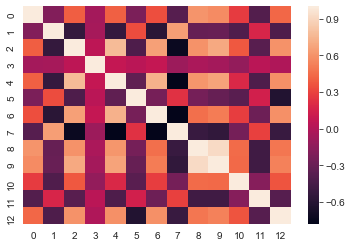

In [9]:
df = pd.DataFrame(train_x)

sns.heatmap(df.corr(method="pearson"))

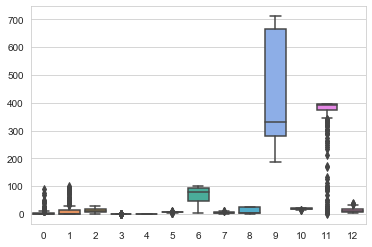

In [10]:
sns.boxplot(data=df, orient="v")

## Normalize the data

In [11]:
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)

train_x = (train_x - mean) / std
test_x = (test_x - mean) / std

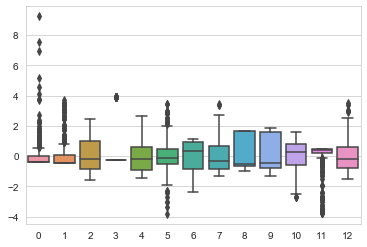

In [12]:
df = pd.DataFrame(train_x)

sns.boxplot(data=df, orient="v")

## Train

In [13]:
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=train_x.shape[1:]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [15]:
history = model.fit(x=train_x, y=train_y, validation_split=0.2, shuffle=True, batch_size=16, epochs=80)
history.history.keys()

Train on 323 samples, validate on 81 samples
Epoch 1/80
323/323 [==============================] - 0s 758us/sample - loss: 523.2275 - mae: 21.0170 - val_loss: 523.9474 - val_mae: 21.0968
Epoch 2/80
323/323 [==============================] - 0s 89us/sample - loss: 391.6455 - mae: 17.9495 - val_loss: 379.7153 - val_mae: 17.5837
Epoch 3/80
323/323 [==============================] - 0s 98us/sample - loss: 252.3180 - mae: 13.9274 - val_loss: 227.5072 - val_mae: 12.6440
Epoch 4/80
323/323 [==============================] - 0s 106us/sample - loss: 135.2768 - mae: 9.3955 - val_loss: 132.6496 - val_mae: 8.7979
Epoch 5/80
323/323 [==============================] - 0s 105us/sample - loss: 77.6059 - mae: 6.5805 - val_loss: 79.4612 - val_mae: 6.5316
Epoch 6/80
323/323 [==============================] - 0s 99us/sample - loss: 50.4873 - mae: 5.1201 - val_loss: 54.2439 - val_mae: 5.2216
Epoch 7/80
323/323 [==============================] - 0s 96us/sample - loss: 36.8772 - mae: 4.2093 - val_loss: 39.50

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

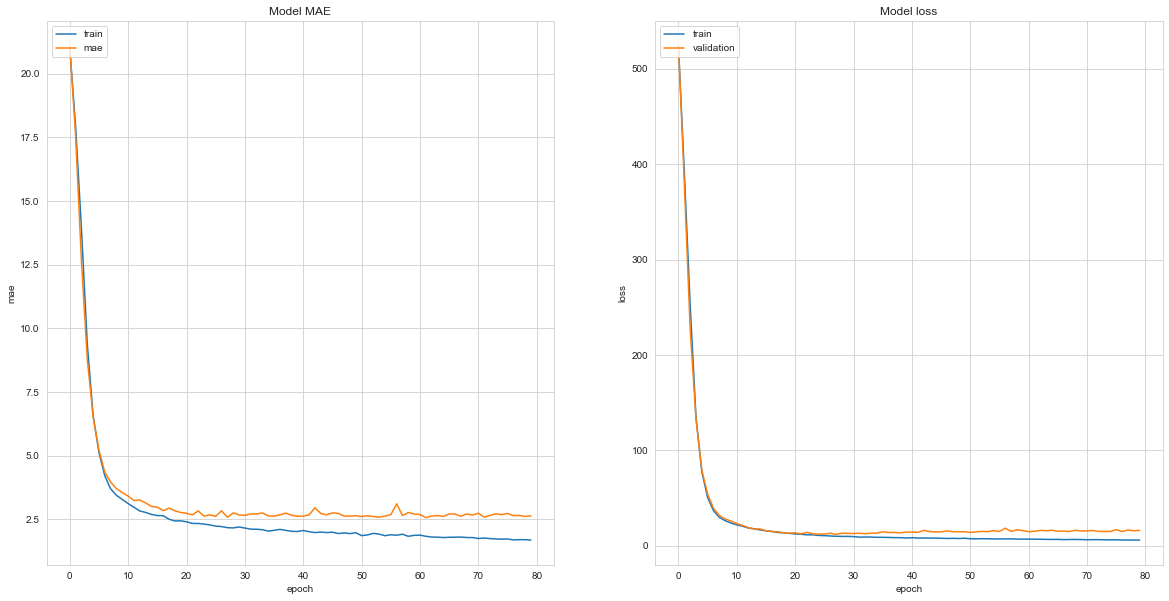

In [16]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'mae'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

## Evaluate

In [17]:
loss, mae = model.evaluate(x=test_x, y=test_y)
loss, mae

102/102 [==============================] - 0s 43us/sample - loss: 26.2034 - mae: 2.9170


(26.203434962852327, 2.9169543)

## Predict on one sentence

In [18]:
model.trainable = False

# Compile model so changes to trainable would take effect
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
index = 0

test = test_x[index].reshape(1, *test_x[index].shape)
test.shape

(1, 13)

In [20]:
output = model(test)
float(output), test_y[index]

(8.413277626037598, 7.2)